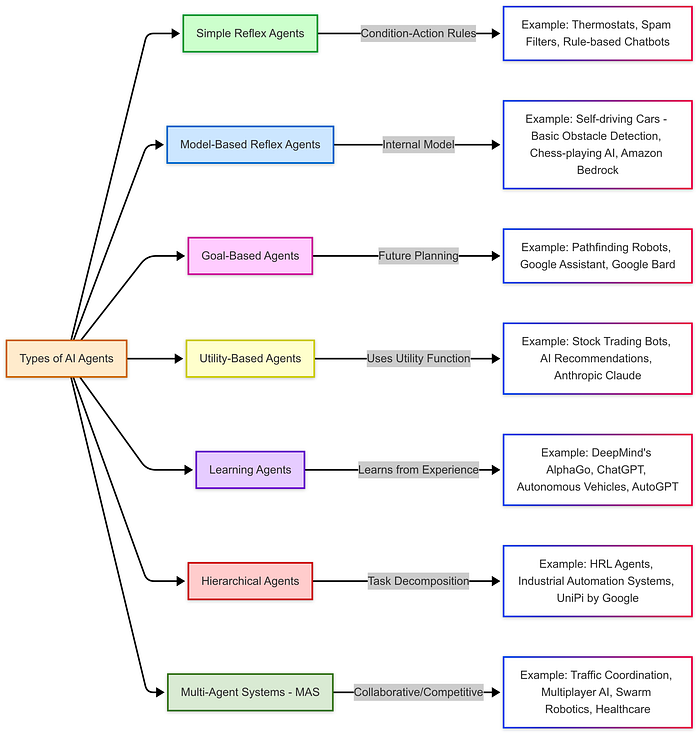

# AI Agent: Types (Part-4)

# Table of Contents
1. Types of AI Agents
- 1.1 Simple Reflex Agent
  - 1.1.1 Implementation
  - 1.1.2 Advantages
  - 1.1.3 Limitations
- 1.2 Model-based Reflex Agent
  - 1.2.1 Implementation
  - 1.2.2 Real-World Example: Amazon Bedrock
  - 1.2.3 Advantages
  - 1.2.4 Disadvantages
- 1.3 Goal-based Agents
  - 1.3.1 Implementation
  - 1.3.2 Real-World Example: Google Bard
  - 1.3.3 Advantages
  - 1.3.4 Disadvantages
- 1.4 Utility-based Agents
  - 1.4.1 Implementation
  - 1.4.2 Real-World Example: Anthropic Claude
  - 1.4.3 Advantages
  - 1.4.4 Disadvantages
- 1.5 Learning Agents
  - 1.5.1 Implementation
  - 1.5.2 Real-World Example: AutoGPT
  - 1.5.3 Advantages
  - 1.5.4 Disadvantages
- 1.6 Hierarchical Agents
  - 1.6.1 Implementation
  - 1.6.2 Real-World Example: UniPi by Google
  - 1.6.3 Advantages
  - 1.6.4 Disadvantages
- 1.7 Multi-Agent Systems
  - 1.7.1 Key features of multi-agent systems (MAS)
  - 1.7.2 Real-life use cases of multi-agent systems (MAS)
  - 1.7.3 Advantages
  - 1.7.4 Disadvantages
2. Transformative Applications Across Industries
3. Conclusion

Trong blog này:
- Các kiểu AI Agents
- Implementation
- Ứng dụng thực tiễn
- Lợi ích
- Giới hạn

# 1. Types of AI Agents

AI agent được phân loại dựa trên cách hành động của tác nhân ảnh hưởng đến trí thông minh và khả năng nhận thức của chúng, chẳng hạn:
- Simple reflex agents: Các tác nhân phản xạ đơn giản
- Model-based agents: Các tác nhân dựa trên mô hình
- Goal-based agents: Các tác nhân dựa trên mục tiêu
- Utility-based agents: Các tác nhân dựa trên tiện ích
- Learning agents: Các tác nhân học tập
- Hierarchical agents: Các tác nhân phân cấp
- Multi-Agent Systems (MAS): Hệ thống đa tác nhân

## 1.1 Simple Reflex Agent
Phản hồi dựa trên một tập hợp các quy tắc được xác định trước và không xem xét đến kinh nghiệm trong quá khứ khi quyết định. Những tác nhân này phù hợp với các tác vụ đơn giản không đòi hỏi tư duy chiến lược

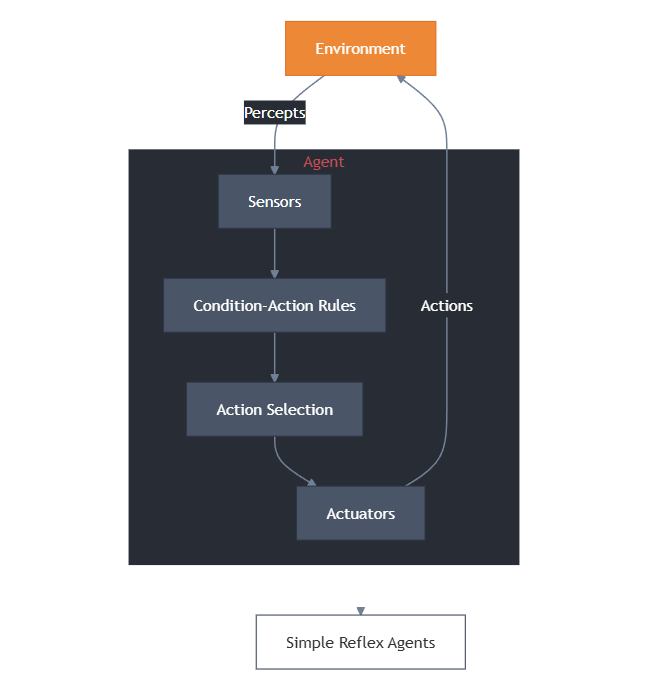

### 1.1.1 Implementation

In [12]:
class SimpleReflexVacuumAgent:  
    def __init__(self):  
        self.location = "A"  
        self.actions = []  
    def perceive_and_act(self, current_location, is_dirty):  
        if is_dirty:  
            self.actions.append("Suck")  
            print(f"Cleaned {current_location}")  
        else:  
            if current_location == "A":  
                self.actions.append("MoveRight")  
                self.location = "B"  
            else:  
                self.actions.append("MoveLeft")  
                self.location = "A"  
            print(f"Moved to {self.location}")  

# Execution  
agent = SimpleReflexVacuumAgent()  
percepts = [("A", True), ("A", False), ("B", True), ("B", False)]  
for loc, dirt in percepts:  
    agent.perceive_and_act(loc, dirt)
    print(f"Current Location: {agent.location}, Actions: {agent.actions}")

Cleaned A
Current Location: A, Actions: ['Suck']
Moved to B
Current Location: B, Actions: ['Suck', 'MoveRight']
Cleaned B
Current Location: B, Actions: ['Suck', 'MoveRight', 'Suck']
Moved to A
Current Location: A, Actions: ['Suck', 'MoveRight', 'Suck', 'MoveLeft']


Explaination:
Mã trên hoạt động dựa trên điều kiện mà không xem xét đến các khía cạnh khác trong quá khứ. Những mã kiểu này phù hợp với:
- Fully observable: Có thể quan sát đầy đủ, khi tác nhân có đầy đủ thông tin về trạng thái
- Deterministic: Xác định khi kết quả có thể dự đoán dựa trên hành dộng

Mechanism: Cơ chế tuân theo một quy tắc được xác định trước để xác định hành động

Suitable for:
- tác vụ đơn giản dựa trên quy tắc, trong đó việc đưa ra quyết định không phụ thuộc dữ liệu (vd: chatbot tự động dựa trên từ khóa)
- Bộ điều nhiệt kỹ thuật số
- Tự động hóa công nghiệp

### 1.1.2 Advantages
- Dễ dàng triển khai
- Phản hồi thời gian thực
- Đáng tin tưởng trong các tình huống các đầu vào đáng tin cậy
- Không cần đào tạo chuyên sâu và phần cứng phức tạp

### 1.1.3 Limitations
- Khả năng thích nghi với sự thay đổi của môi trường thấp
- Hạn chế về trí nhờ trước đây
- Không có khả năng học tập để cải thiện quyết định theo thời gian

## 1.2 Model-based Reflex Agent
Tác nhân phản xạ dựa trên mô hình

Các tác nhân dựa trên mô hình duy trì các biểu diễn nội bộ của các trạng thái để xử lý khả năng quan sát. Một phản xạ dựa trên mô hình thực hiện các hành động dựa trên các nhận thức hiện tại và trạng thái nội bộ đại diện. Có hai yếu tố để cập nhật trạng thái nội bộ:
- Thế giới tiến hóa độc lập với các tác nhân như thế nào
- Hành động của tác nhân ảnh hưởng đến môi trường xung quanh như thế nào

Một tác nhân phản xạ dựa trên mô hình cảnh báo là một biến thể của tác nhân phản xạ dựa trên mô hình cũng xem xét những hậu quả có thể xảy ra của hành động trước khi thực hiện chúng

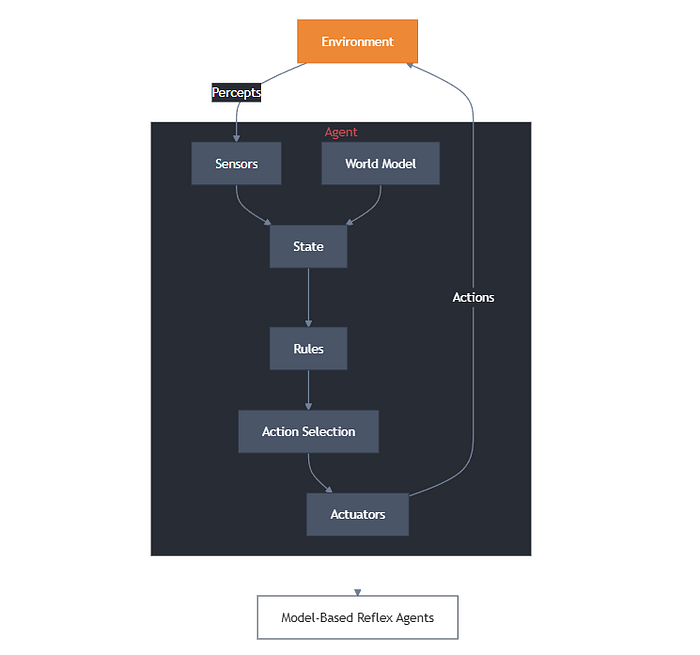

### 1.2.1 Implementation

In [13]:
class ModelBasedVacuumAgent:
    def __init__(self):
        self.model = {"A": "Unknow", "B": "Unknow"}
        self.location = "A"

    def update_model(self, loc, status):
        self.model[loc] = "Clean" if status else "Dirty"

    def decide_action(self, current_loc, is_dirty):
        self.update_model(current_loc, is_dirty)
        if is_dirty:
            return "Suck"
        elif self.model['A'] == "Clean" and self.model['B'] == "Clean":
            return "Shutdown"
        else:
            return "MoveRight" if current_loc == "A" else "MoveLeft"
        
# Usage
agent = ModelBasedVacuumAgent()
print(agent.decide_action("A", True))

Suck


Bằng cách duy trì mô hình tổng và trạng thái tài nguyên, tác nhân có thể đưa ra quyết định sáng suôt bất chấp những hạn chế của cảm biến.

Tác nhân phản xạ dựa trên mô hình tuân theo quy tắc điều kiện hành động để xác định hành vi phù hợp trong tình huống nhất dịnh. Tuy nhiên không giống như tác nhân phản xạ đơn giản, nó còn duy trì trạng thái nội tại để theo dõi các thay đổi môi trường và tăng cường khả năng ra quyết định. Điều này cho phép tác nhân hoạt động hiệu quả ngay cả khi các yếu tố môi trường chỉ quan sát được một phần.

Cá tác nhân phản xạ dựa trên mô hình hoạt động theo một quy trình có cấu trúc bao gồm 4 giai đoạn sau:
- Sensor: cảm biến - tác nhân  cảm nhận các trạng thái hiện tại của những yếu tố bên ngoài
- Model: Xây dựng một mô hình nội bộ dựa trên các quan sát
- Reason: Lý trí - Tác nhân đánh giá các mô hình (như kiểu các trường hợp) nội bộ của mình và áp dụng các quy tắc hoặc phương pháp luận được xác định trước để đưa ra lựa chọn tốt nhất
- Act: tác nhân hành động theo mô hình đã chọn

Suitable for: Các tác nhân phản xạ dựa trên mô hình được sử dụng rộng rãi trong nhiều ngành công nghiệp khác nhau, đặc biệt trong các hệ thống yêu cầu khả năng thích ứng động và ra quyết định theo thời gian thực

- Smart inventory management: Hệ thống điều khiển bằng AI theo dõi mức tồn kho, phân tích lịch sử mua hàng và dự đoán biến động nhu cầu.
- Financial trading systems: các hệ thống giao dịch tài chính. duy trì mô hình thị trường và phản ứng với sự thay đổi giá theo thời gian thực

### 1.2.2 Real-World Example: Amazon Bedrock
Là một dịch vụ nhận dữ liệu và dự đoán kết quả để đưa ra quyết định tối ưu sáng suốt.

### 1.2.3 Advantages
- Enhanced Perception & Memory: tác nhân duy trì một mô hình nội bộ để theo dõi các thay đổi theo thời gian
- Better Decision-Making: Xử lý sự không chắc chắn trong môi trường chỉ có thể quan sát được một phần bằng cách suy luận dựa trên dữ liệu lịch sử

### 1.2.4 Disadvantages
- Có thể tốn kém về mặt tính toán
- Có thể không nắm bắt trọn vẹn được sự phức tạp của môi trường thực tế
- Khó có thể dự đoán được các tình huống tiềm ẩn có thể phát sinh
- Cần được cập nhật thường xuyên

## 1.3 Goal-based Agents
Tác nhân dựa trên mục tiêu được điều khiển bởi AI, sử dụng thông tin môi trường để đạt được mục tiêu cụ thể. Các tác nhân này xác định trình tự tối ưu và các quyết định hành động cần thiết để đạt được kết quả mong muốn. Phương pháp này sử dụng thuật toán tìm kiếm và phương pháp tìm kiếm để tìm ra con đường hiệu quả nhất đến mục tiêu. Nhờ khả năng ra quyết định có cấu trúc, chúng phù hợp với các nhiệm vụ phức tạp đòi hỏi khả năng lập kế hoạch và chiến lược thích ứng.

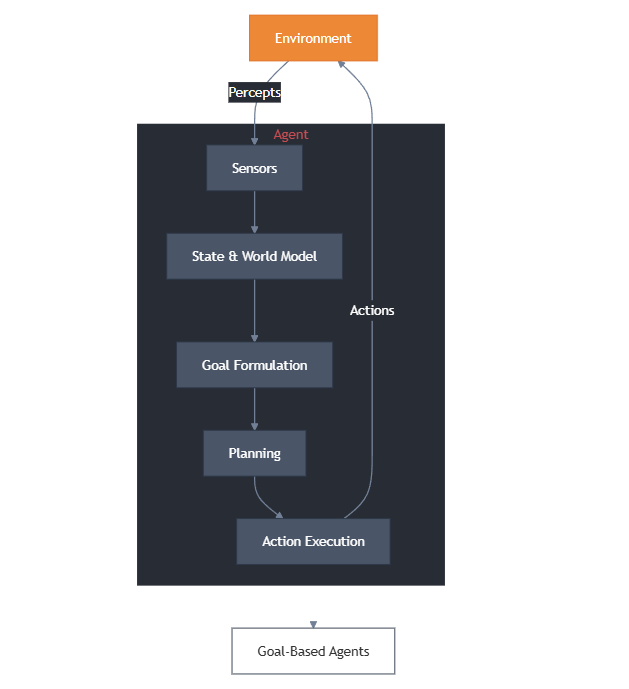

### 1.3.1 Implementation
Các tác nhân hướng mục tiêu sẽ chọn các hành động tối đa hóa tiến độ hương tới mục tiêu đã xác định sử dụng các thuật toán tìm kiếm và lập kế hoạch. Các tác nhân đánh giá tình hình hiện tại so với mục tiêu, lựa chọn các hành động giúp giảm khoảng cách đến mục tiêu. Các triển khai phức tạp có thể tích hợp thuật toán duyệt đồ thị

In [14]:
class GoalBasedAgent:
    def __init__(self, target):
        self.goal = target
        self.actions = []

    def path_planning(self, current_state):
        if current_state == self.goal:
            return "Goal Reached"
        return "Move closer" if current_state < self.goal else "Adjust path"
    
agent = GoalBasedAgent(100)
print(agent.path_planning(75))

Move closer


- Suitable For: Hiệu quả đối với nhiệm vụ đòi hỏi khả năng lập kế hoạch có cấu trúc và khả năng thích ứng

Ứng dụng:
- Autonomous Vehicles:
- Robotics:
- R Computer Vision & NLP: Phân tích hình ảnh, video và văn bản và phản hồi liên quan

### 1.3.2 Real-World Example: Google Bard
- Là một tác nhân hướng mục tiêu, cung cấp phản hồi chính xác và chất lượng cao cho truy vấn của người dùng, lựa chọn các hành động giúp người dùng tìm thấy các thông tin liên quan

### 1.3.3 Advantages

### 1.3.4 Disadvantages


## 1.4 Utility-based Agents
Tác nhân dựa trên tiện ích là những người ra quyết định được điều khiển bởi AI, lựa chọn hành động dựa trên hàm tiện ích - thước đo mức độ thuận lợi của kết quả . Phương pháp đánh giá nhiều hành động khả thi và chọn hành động có tiện ích kỳ vọng cao nhất, đảm bảo ra quyết định linh hoạt và thích ứng hơn

=> Hữu ích trong môi trường phức tạp và không chắc chắn các điều kiện, nơi cần so sánh các lựa chọn và quyết định lựa chọn linh hoạt

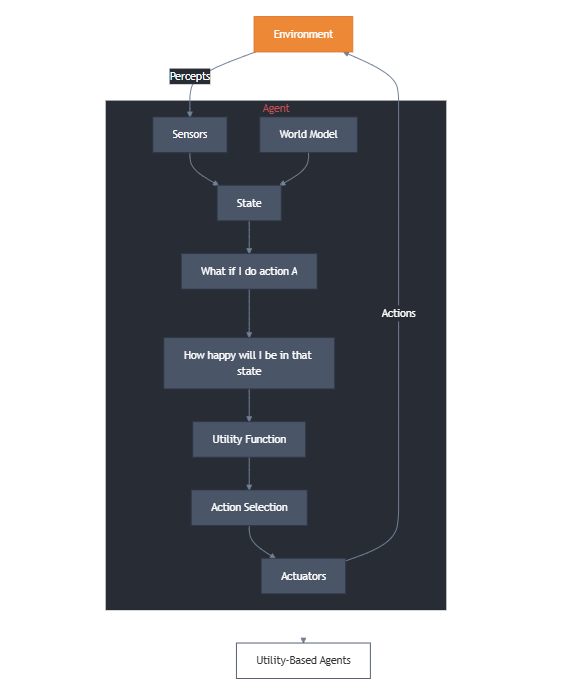

### 1.4.1 Implementation

In [15]:
def utility_function(cost, time, risk):  
    return (0.5 * (1/cost)) + (0.3 * (1/time)) - (0.2 * risk)  

actions = [  
    {"cost": 200, "time": 5, "risk": 0.1},  
    {"cost": 300, "time": 3, "risk": 0.2}  
]  
best_action = max(actions, key=lambda x: utility_function(x['cost'], x['time'], x['risk']))  
print(f"Optimal action: {best_action}")

Optimal action: {'cost': 300, 'time': 3, 'risk': 0.2}


Suitable For: Phù hợp cho các tác nhân dựa trên tiện ích được sử dụng rộng rãi trong các ứng dụng phi tập trung vào tối ưu hóa 

### 1.4.2 Real-World Example: Anthropic Claude
Anthropic Claude, một công cụ AI có mục tiêu giúp chủ thẻ tối đa hóa phần thưởng và lợi ích khi sử dụng thẻ, là một tác nhân dựa trên tiện ích.

### 1.4.3 Advantages
- Xử lý sự không chắc chắn, có thẻ đưa ra quyết định tối ưu trong môi trường năng động và khó lường
- Ra quyết định so sánh: Đánh giá nhiều lựa chọn và chọn hành động tốt nhất có thể
- Linh hoạt và thích ứng: điều chỉnh chiến lược dựa trên các yếu tố thay đổi đầu vào và kết quả

# 1.5 Learning Agents

Tác nhân AI học tập cho phép học hỏi kinh nghiệm trong quá khứ và cải thiện hiệu suất theo thời gian. Các tác nhân này bắt đầu với kiến thức cơ bản và tự điều chỉnh thông qua các kỹ thuật học máy. bằng cách tiếp tục phân tích phản hồi và tương tác, các tác nhân tự động điều chỉnh hành vi của mình khiến chúng trở nên lý tưởng và phù hợp với môi trường luôn có sự thay đổi.

Tác nhân AI học tập gồm 4 thành phần chính:
- Thành phần học tập (learning element): chịu trách nhiệm học tập và cải thiện dựa trên kinh nghiệm từ môi trường
- Người phê bình (critic): đánh giá hiệu quả của tác nhân và cung cấp phản hồi để cải thiện hiệu quả
- Thành phần hiệu suất (performance element): thực hiện các hành động bên ngoài dựa những hiểu biết từ thành phần học tập và phê bình
- Người tạo đề xuất (Problem generator): Đề xuất những hành động mới để tạo ra trải nghiệm bổ ích, nâng cao khả năng học tập

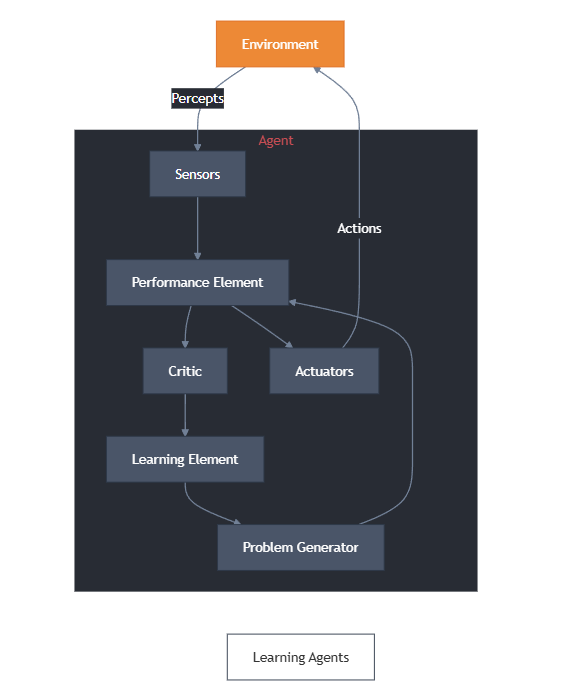

## 1.5.1 Implementation
Các tác nhân học tập và cải thiện hiệu suất thông qua kinh nghiệm, thường sử dụng các kỹ thuật học tăng cường 

Cơ chế học tập (machine learning): Phương pháp Q-learning học tập dựa trên phần thưởng nhận được => dần dần tối ưu hóa việc lựa chọn hành động

In [16]:
import numpy as np

class QLearningAgent:
    def __init__(self, states, actions, alpha=0.1, gamma=0.9):
        self.q_table = np.zeros((states, actions))
        self.alpha = alpha
        self.gamma = gamma

    def learn(self, state, action, reward, next_state):
        max_future_q = np.max(self.q_table[next_state])
        current_q = self.q_table[state, action]
        new_q = (1 - self.alpha) * current_q + self.alpha * (reward + self.gamma * max_future_q)
        self.q_table[state, action] = new_q

# Initialization
agent = QLearningAgent(states=5, actions=4)
agent.learn(state=1, action=2, reward=10, next_state=3)

Các tác nhân AI học tập hoạt động theo chu kỳ phản hồi liên tục , cho phép chúng quan sát, học hỏi và thích ứng:
- Observation: thu thập dữ liệu từ môi trường xung quanh bằng cảm biến hoặc đầu vào
- Learning: phân tích dữ liệu bằng các thuật toán và mô hình thống kê, xác định các mẫu và tinh chỉnh kiến thức
- Action: Dựa trên những hiểu biết đã học, tác nhân ra quyết định và hành động trong môi trường của mình
- Feedback: Tác nhân nhận được phần thưởng, hình phạt hoặc tín hiệu môi trường để đánh giá hiệu suất của mình
- Adaptation: Sử dụng phản hồi, tác nhân cập nhật kiến thức và quy trình ra quyết định liên tục cải thiện

=> Quá trình này lặp lại theo thời gian, cho phép tác nhân tinh chỉnh quá trình ra quyết định và điều chỉnh theo những hoàn cảnh thay đổi

Suitable For: Các tác nhân học tập đặc biệt trong các tình huống đòi hỏi cải thiện liên tục và cá nhân hóa
- E-commerce Personalization: Hệ thống đề xuất dựa trên phân tích dựa trên hành vi người dùng để cải thiện quảng cáo có mục tiêu

### 1.5.2 Real-World Example: AutoGPT

### 1.5.3 Advantages
- Có thể chuyển đổi ý tưởng thành hành động dựa trên các quyết định của AI
- Các tác nhân học tập thông mình có thể làm theo các lệnh cơ bản như hướng dẫn bằng lời nói để thực hiện các nhiệm vụ
- Không giống như các agent cổ điển (các hành động được xác định trước), các tác nhân học tập có thể phát triển theo thời gian

### 1.5.4 Disadvantages
- Dễ bị thiên vị và ra quyết định không chính xác
- Chi phí phát triển và bảo trì cao
- yêu cầu tài nguyên tính toán đáng kể
- Phụ thuộc vào lượng dữ liệu lớn
- Thiếu trực giác và khả năng sáng tạo như con người

## 1.6 Hierarchical Agents

Các tác nhân phân cấp là hệ thống AI được cấu trúc theo hệ thống phân cấp, trong đó các tác nhân cấp cao giám sát các tác nhân cấp thấp hơn. Cấu trúc này cho phép quản lý các tác vụ hiệu quả, đảm bảo các mục tiêu được chia nhỏ thành cá nhiệm vụ con để dễ quản lý. Số lượng cấp độ trong hệ thống phân cấp phụ thuộc vào độ phức tạp của hệ thống

Các tác nhân này được sử dụng rộng rãi trong lĩnh vực đòi hỏi sự phối hợp và ưu tiên nhiều nhiệm vụ, chẳng hạn như robot, sản xuất và vận tải

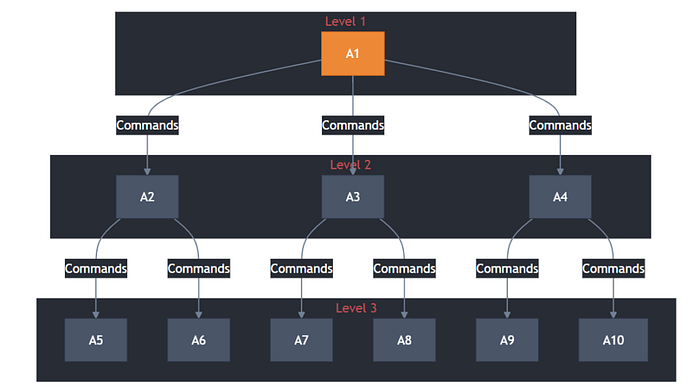

### 1.6.1 Implementation
**Layer Architecture:**
- Các tác nhân phân cấp sử dụng nhiều cấp độ trừu tượng
- Các lớp cấp cao xử lý các quyết định chiến lược
- Các lớp thấp hơn quản lý việc thực hiện chiến thuật

**Delegation Logic:** Logic ủy quyền
- Tác nhân giám sát quản lý sự phối hợp của hệ thống con => thể hiện kiến trúc trách nhiệm phân tán

In [17]:
class SupervisorAgent:
    def __init__(self):
        self.subagents = {
            "security": SecurityAgent(),
            "climate": ClimateAgent()
        }
    
    def coordinate(self, sensor_data):
        if sensor_data["intruder"]:
            self.subagents["security"].activate()
        else:
            self.subagents["climate"].adjust(sensor_data["temp"])
    
class SecurityAgent:
    def activate(self):
        print("Security protocols engaged!")

class ClimateAgent:
    def adjust(self, temp):
        action = "Cool" if temp > 72 else "Heat"
        print(f"Climate system: {action} activated!")

# System execution
smart_home = SupervisorAgent()
smart_home.coordinate({"intruder": True, "temp": 68})

Security protocols engaged!


Hoạt động của các tác nhân phân cấp tương ứng với tổ chức của một doanh nghiệp, nơi các nhiệm vụ quản lý được tổ chức ở các cấp độ khác nhau

Suitable For: Các tác nhân phân cấp lý tưởng cho các doanh nghiệp quy mô lớn và các doanh nghiệp có yêu cầu thực hiện tác vụ có cấu trúc. Một số ứng dụng chính bao gồm:
- Industrial Automation: Managing manufacturing workflows with multiple production stages
- Autonomous Robotics: Coordinating high-level navigation and low-level motor control.
- Transportation Systems: Optimizing traffic control and logistics.
- 
### 1.6.2 Real-World Example: UniPi by Google
- Là một tác nhân AI phân cấp sáng tạo sử dụng văn bản và video làm giao diện chung, cho phép nó học nhiều tác vụ khác nhau trong nhiều môi trường khác nhau

**How UniPi Works:**
- High-Level Policy: tạo hướng dẫn và bản trình diễn dựa trên nhiều thông tin đầu vào khác nhau, bao gồm văn bản và video
- Low-Level Policy: thực hiện nhiệm vụ bằng cách thông qua bắt chước và học tăng cường
- Chính sách cao cấp thích ứng với nhiều môi trường khác nhau, trong khi chính sách cấp thấp tinh chỉnh các chiến lược thực hiện dựa trên phản hồi

### 1.6.3 Advantages
- Quản lý tác vụ có khả năng mở rộng: Cho phép xử lý nhiều tác vụ phụ thuộc lẫn nhau trong hệ thống quy mô lớn
- Nâng cao hiệu quả: Phân tích các vấn đề phức tạp thành các nhiệm vụ nhỏ dễ quản lý, tăng tốc độ thực hiện
- Khả năng thích ứng: Cấu trúc phân cấp cho phép ưu tiên và phối hợp nhiệm vụ một cách linh hoạt

### 1.6.4 Disadvantages
- Sự phức tạp phát sinh khi sử dụng hệ thống phân cấp để giải quyết vấn đề
- Hệ thống phân cấp cố định hạn chế khả năng thích ứng trong môi trường thay đổi hoặc không chắc chắn, cản trở khả năng điều chỉnh hoặc tìm kiếm phương pháp thay thế của tác nhân
- Có thể gây ra tắc nghẽn và chậm trễ ngay cả khi cấp dưới đã sẵn sàng
- Không có khả năng tái sử dụng trên nhiều miền vấn đề, đòi hỏi thời gian và chuyên môn để tạo ra hệ thống phân cấp mới
- Đào tạo các tác nhân phân cấp gặp nhiều thách thức do nhu cầu sử dụng dữ liệu đào tạo được gắn nhãn và thiết kế thuật toán. Việc này khiến cho việc sử dụng kỹ thuật học máy trở nên phức tạp và tinh vi hơn

## 1.7 Multi-Agent Systems
Hệ thống đa tác tử (MAS) không hẳn là một tác tử AI khác biệt. Thay vào đó chúng tập hợp các tác tử phân phối với nhau và hoạt động như một đơn vị duy nhất.

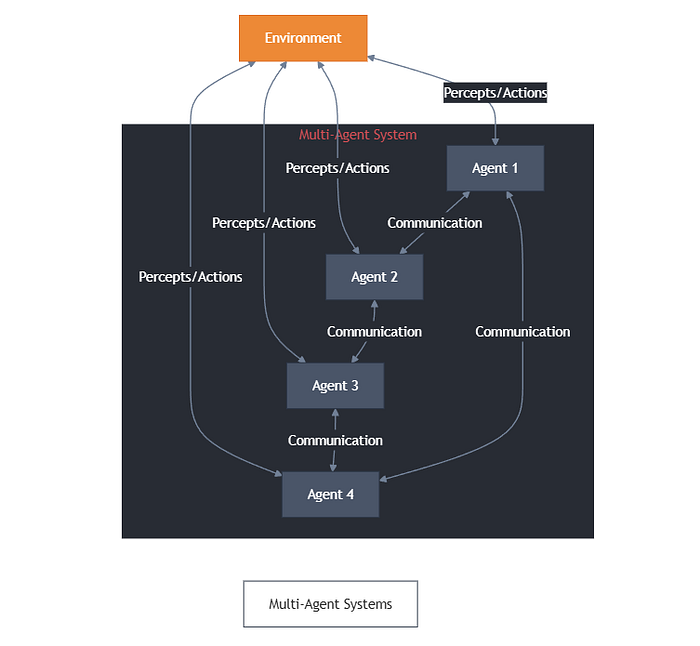

Điều này có thể bao gồm nhiều loại agent đã được đề cập ở trên

Không giống như các tác nhân phân cấp, MAS có mục tiêu và chức năng của riêng nó nhưng tương tác với các agent khác để đạt được mục tiêu chung hoặc tối ưu cho một đầu ra cá nhân

### 1.7.1 Key features of multi-agent systems (MAS)
- Decentralization (phân quyền): quyết định được phân bổ cho nhiều tác nhân
- Collaboration and competition (hợp tác hoặc cạnh tranh): các tác nhân hoạt động cùng nhau hoặc cạnh tranh tùy thuộc vào tình huống
- Scalability (khả năng mở rộng): có thể xử lý các vấn đề quy mô lớn bằng cách phân bổ khối lượng công việc
- Specialization (chuyên môn hóa): mỗi tác nhân có thể tập trung vào một nhiệm vụ cụ thể trong hệ thống

### 1.7.2 Real-life use cases of multi-agent systems (MAS)
Hệ thống đa tác tử thường phức tạp và được sử dụng trong môi trường quy mô lớn. Một ví dụ điển hình là AI trong chăm sóc sức khỏe sử dụng nhiều tác tử để điều phối chăm sóc bệnh nhân, tối ưu hóa nguồn lực bệnh viện và cung cấp thuốc. các tác tử đóng vai trò quan trọng và hoạt động độc 

### 1.7.3 Advantages
- khả năng mở rộng cho ứng dụng phức tạp
- quy mô lớn

### 1.7.4 Disadvantages
- việc phối hợp giữa các tác nhân có thể phức tạp
- có khả năng xảy ra xung đột nếu các tác nhân xảy ra cạnh tranh

# 2. Transformative Applications Across Industries

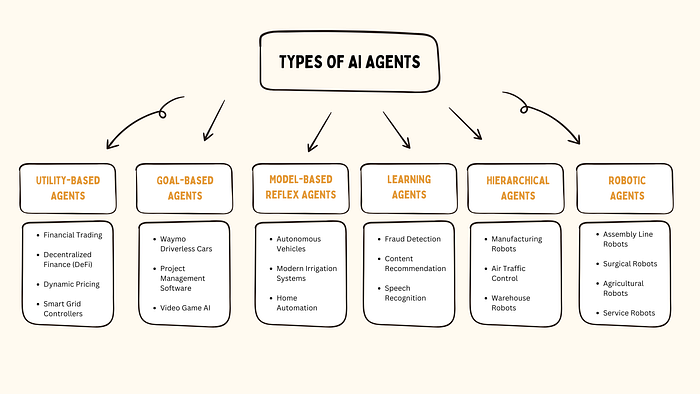

- khai thác tối đa tiềm năng doanh nghiệp bằng cách tích hợp các đại lý tự động vào các ngành nghề
- Bảng dưới đây trình bày các trường hợp sử dụng đại lý AI theo từng ngành 

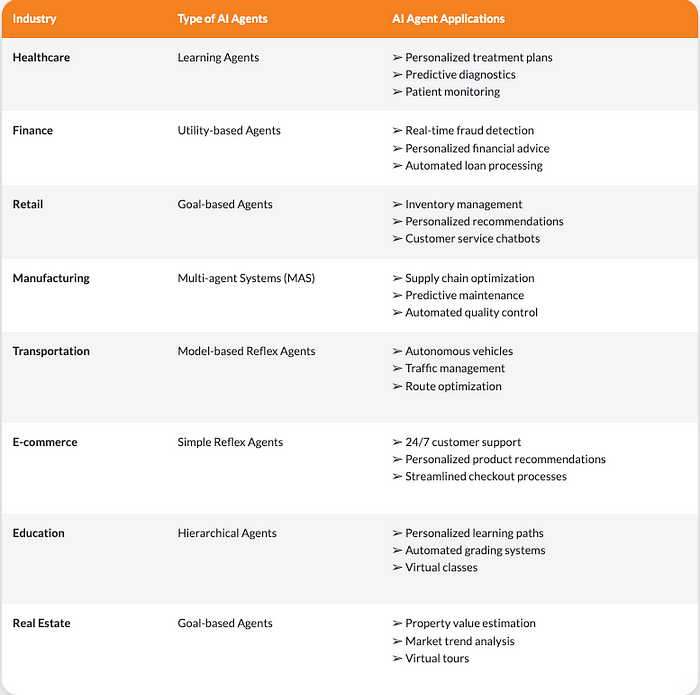

# 3. Conclusion

- Phân loại tác nhân AI thể hiện một chuỗi liên tục từ kiến trúc phản ứng đến các hệ thống học tập tinh vi, mỗi hệ thống đều có những ứng dụng độc đáo trên nhiều ngành dọc
- sự kết hợp chiến lược giữa các loại tác nhân trong khuôn khổ đa tác nhân cho phép giải quyết các vấn đề phức tạp chưa từng có